In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import glob
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
plt.rcParams.update({'font.size': 28})

In [2]:
noise = 4
OPTIMIZER = "DPSGD"

In [4]:
sets = [
    'dpsgd',
    'dpadam'
]

In [5]:
low = None

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/Simulation-Exp/dpsgd-NM4.png'

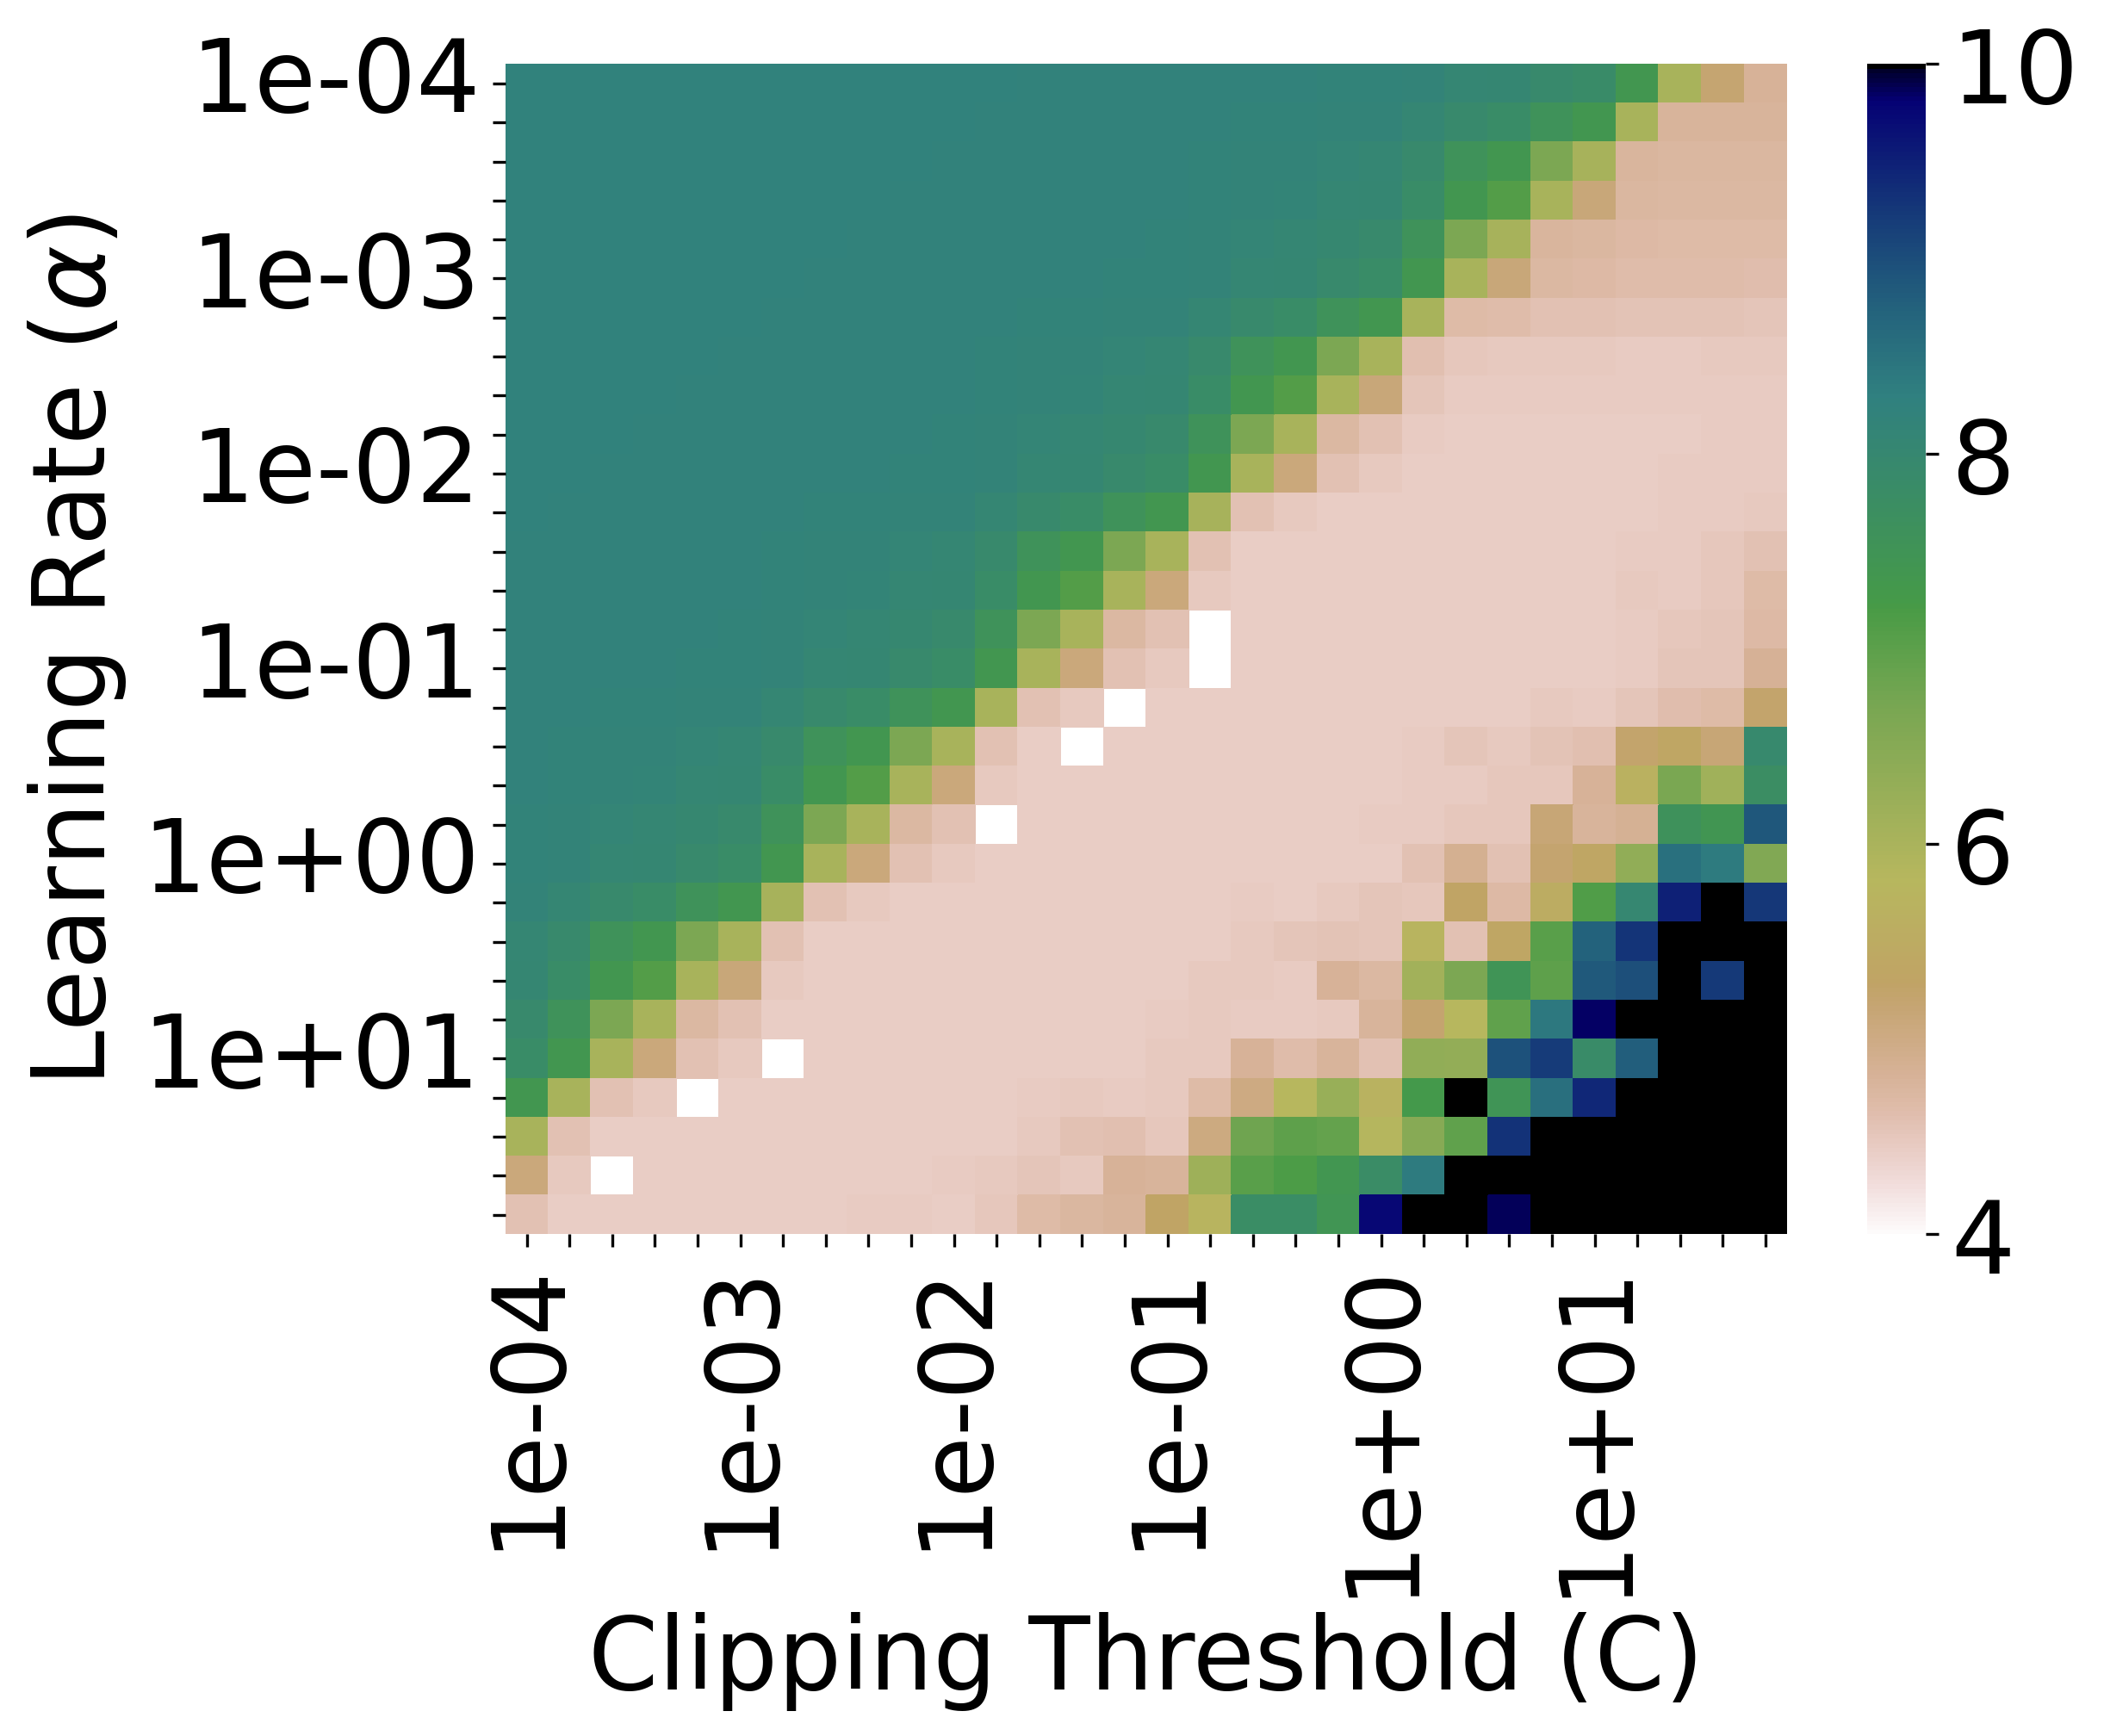

In [7]:
for OPTIMIZER in sets:
    data = pd.read_csv(f'Results/{OPTIMIZER}-nm{noise}.txt', sep=' ')
    data['Clip'] = data['Clip'].round(4)

    data = data.pivot("LR","Clip","Loss")
    tc = ["{:.0e}".format(x) for x in data.index]
    tc2 = []
    for x in tc:
        if str(x)[0]=='1':
            tc2.append(x)
        else:
            tc2.append("")
            
    xtc = ["{:.0e}".format(x) for x in data.columns]
#     xtc = data.columns
    xtc2 = []
    for x in xtc:
        if str(x)[0]=='1':
#         if str(x)[-1]=='8' or str(x)[-1]=='1' or str(x)[-1]=='4' or str(x)[0]=='8' or str(x)[0]=='1' or str(x)[0]=='4':
            xtc2.append(x)
        else:
            xtc2.append("")
    figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    data = np.log(data)
    if low == None:
        low = np.percentile(data, 1)
    sns.heatmap(data, xticklabels=xtc2,yticklabels=tc2,cmap='gist_earth_r', vmin=4, vmax=10, mask=data<low)
    
    with sns.plotting_context("notebook",font_scale=1.2):
        plt.ylabel('Learning Rate '+r'($\alpha$)')
        plt.xlabel('Clipping Threshold (C)')
    plt.savefig(f'Plots/Simulation-Exp/{OPTIMIZER}-NM{noise}', bbox_inches="tight", dpi=300)
    plt.title(OPTIMIZER)
    plt.show()